In [1]:
root="../../.."

---
# Plot the scores for publication

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [3]:
score = pd.read_csv("%s/codes/AI/input/score.csv"%(root), index_col=0)
metadata = pd.read_csv("%s/data/metadata/Metadata_061523.csv"%(root), index_col=0)

In [4]:
y = metadata.loc[score.index, 'study_ptorhc']
X = score

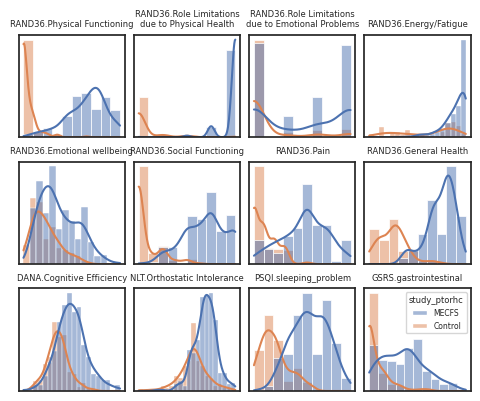

In [5]:
dataset = pd.concat([y, X], axis=1)
sns.set(style='ticks', font_scale=0.5)

num_columns = len(dataset.columns) - 1 
fig, axes = plt.subplots(3, 4, figsize=(4.7, 4))
axes = axes.flatten()
for i, column in enumerate(dataset.columns):
    if column != 'study_ptorhc':
        ax = axes[i-1]
        sns.histplot(data=dataset, x=column, hue='study_ptorhc', kde=True, ax=ax)
        ax.set_title(column.replace(" due to","\ndue to"))
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)
        if i < 12: ax.get_legend().remove()

plt.tight_layout()
plt.savefig("%s/output/AI_figure/12_Score_distribution.png"%(root), 
            dpi=600, bbox_inches='tight')

In [6]:
y = y.map({'Control': 0, 'MECFS': 1})

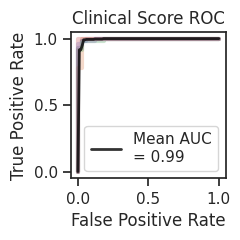

In [7]:
cv = StratifiedKFold(n_splits=5)
clf = LogisticRegression(max_iter=10000)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

sns.set(style='ticks', font_scale=1)
plt.figure(figsize=(2, 1.9))

# Plot ROC curve on the first subplot
for train, test in cv.split(X, y):
    probas_ = clf.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=3, alpha=0.3)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='black', label='Mean AUC\n= %0.2f' % (mean_auc), lw=2, alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Clinical Score ROC')
plt.legend(loc='lower right')

#plt.savefig("%s/output/AI_figure/12_Score_ROC.png"%(root), dpi=300, bbox_inches='tight')